<a href="https://colab.research.google.com/github/FacuRoffet99/ML/blob/main/TP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 2: Segmentación de clientes

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, KMeans
from sklearn.manifold import TSNE

# Carga y preprocesamiento de datos

In [256]:
# Cargar dataset
customers = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectWC/data/wholesale_customers_data.csv")
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [257]:
# Ver si hay valores nulos: no los hay
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe276bc86d0>,
      dtype=object)

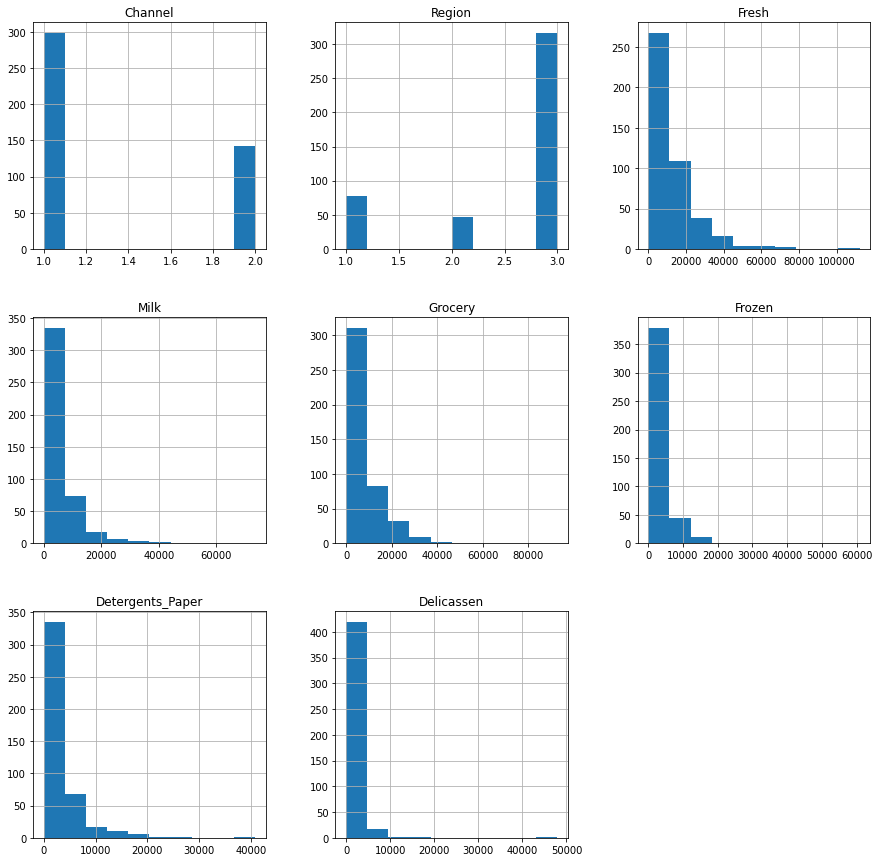

In [258]:
# Graficar histograma para detectar errores: si bien hay algunos outliers, parecen ser valores razonables
customers.hist(figsize=(15,15))

# Clusterización MeanShift
Los resultados obtenidos con este método no son buenos. Divide a los 480 datos en 12 clusters, pero el cluster 0 contiene al 84% de los puntos. Esto impide una segmentación realista de los clientes.

In [259]:
# MeanShift
ms = MeanShift(bin_seeding=True, n_jobs=4)
ms.fit(customers)
# Iteraciones
print('Cantidad de iteraciones: {}'.format(ms.n_iter_))

Cantidad de iteraciones: 17


In [260]:
# Clusters de cada sujeto
labels = ms.labels_

# Centros de los clusters
cluster_centers = ms.cluster_centers_

# Numero de clusters
n_clusters_ = len(np.unique(labels))
print("Numero de clusters estimados: {}".format(n_clusters_))

Numero de clusters estimados: 12


In [261]:
# Ver cantidad de sujetos asignados a cada cluster
np.histogram(labels, bins=range(0,n_clusters_+1))[0]

array([403,  13,   1,   1,   2,   1,   1,  14,   1,   1,   1,   1])

In [262]:
# Juntar datos y centros antes de reducir la dimensionalidad
X = np.append(np.array(customers), np.array(cluster_centers), axis=0)

# Reducir de 8 a 2 dimensiones con tSNE (para poder visualizar los resultados)
tsne = TSNE(n_components=2, init='pca', n_iter = 30000, perplexity = 40)
X_embedded = tsne.fit_transform(X)

print('Cantidad de iteraciones: {}'.format(tsne.n_iter_))

Cantidad de iteraciones: 15249


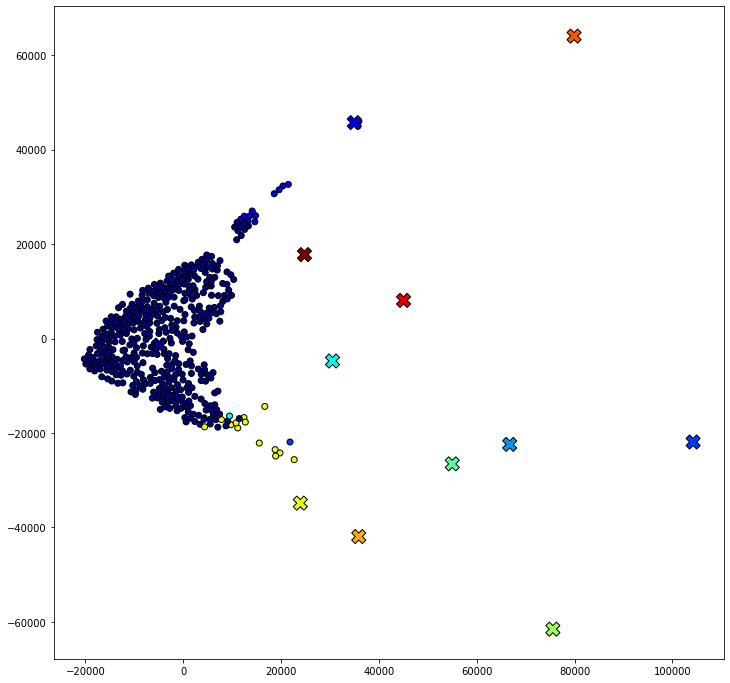

In [263]:
# Índice límite entre datos y centros
limit = customers.shape[0]
labels_centers = range(0, n_clusters_)

# Graficar
fig = plt.figure(figsize=(12,12))
plt.scatter(X_embedded[:limit,0], X_embedded[:limit,1], c=labels, cmap='jet', edgecolors='black')
plt.scatter(X_embedded[limit:,0], X_embedded[limit:,1], c=labels_centers, cmap='jet', marker='X', s=200, edgecolors='black', linewidths=1)
plt.show()

# Clusterización KMeans con 12 clusters
Como MeanShift no funcionó, se probó cambiando a KMeans. El número de clusters se eligió igual al obtenido en la clusterización anterior para poder comparar los resultados. \\

Se obtuvo una división mucho más adecuada, con clusters más significativos. Sin embargo, pareciera ser que existen algunos clusters de más ya que 5 de ellos poseen muy pocos puntos.

In [264]:
# KMeans
km = KMeans(n_clusters=12, max_iter=1000, algorithm='full', random_state=1)
km.fit(customers)
# Iteraciones
print('Cantidad de iteraciones: {}'.format(km.n_iter_))

Cantidad de iteraciones: 10


In [265]:
# Clusters de cada sujeto
labels = km.labels_

# Centros de los clusters
cluster_centers = km.cluster_centers_

# Numero de clusters
n_clusters_ = len(np.unique(labels))
print("Numero de clusters estimados: {}".format(n_clusters_))

Numero de clusters estimados: 12


In [266]:
# Ver cantidad de sujetos asignados a cada cluster
np.histogram(labels, bins=range(0,n_clusters_+1))[0]

array([ 97,  79,   2,  19,  10,   2, 142,   1,   2,  43,  41,   2])

In [267]:
# Juntar datos y centros antes de reducir la dimensionalidad
X = np.append(np.array(customers), np.array(cluster_centers), axis=0)

# Reducir de 8 a 2 dimensiones con tSNE (para poder visualizar los resultados)
tsne = TSNE(n_components=2, init='pca', n_iter = 10000, perplexity = 50)
X_embedded = tsne.fit_transform(X)

print('Cantidad de iteraciones: {}'.format(tsne.n_iter_))

Cantidad de iteraciones: 9999


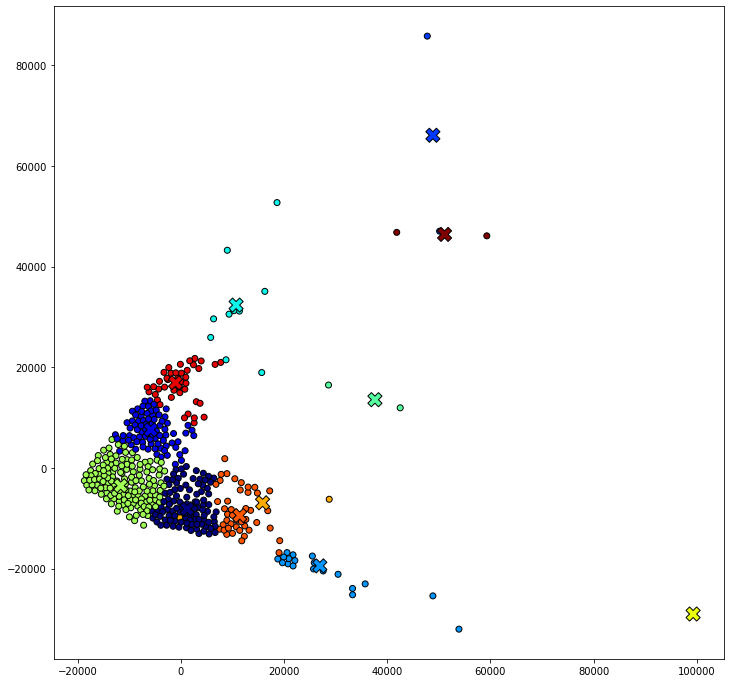

In [268]:
# Índice límite entre datos y centros
limit = customers.shape[0]
labels_centers = range(0, n_clusters_)

# Graficar
fig = plt.figure(figsize=(12,12))
plt.scatter(X_embedded[:limit,0], X_embedded[:limit,1], c=labels, cmap='jet', edgecolors='black')
plt.scatter(X_embedded[limit:,0], X_embedded[limit:,1], c=labels_centers, cmap='jet', marker='X', s=200, edgecolors='black', linewidths=1)
plt.show()

# Clusterización KMeans con 8 clusters
Se replicó exactamente el método anterior, pero cambiando la cantidad de clusters de 8 a 12. Esto produjo una mejora en los resultados al eliminar los cluster innecesarios.

In [269]:
# KMeans
km = KMeans(n_clusters=8, max_iter=1000, algorithm='full', random_state=1)
km.fit(customers)
# Iteraciones
print('Cantidad de iteraciones: {}'.format(km.n_iter_))

Cantidad de iteraciones: 10


In [270]:
# Clusters de cada sujeto
labels = km.labels_

# Centros de los clusters
cluster_centers = km.cluster_centers_

# Numero de clusters
n_clusters_ = len(np.unique(labels))
print("Numero de clusters estimados: {}".format(n_clusters_))

Numero de clusters estimados: 8


In [271]:
# Ver cantidad de sujetos asignados a cada cluster
np.histogram(labels, bins=range(0,n_clusters_+1))[0]

array([179, 101,  89,  38,   3,   5,   2,  23])

In [272]:
# Juntar datos y centros antes de reducir la dimensionalidad
X = np.append(np.array(customers), np.array(cluster_centers), axis=0)

# Reducir de 8 a 2 dimensiones con tSNE (para poder visualizar los resultados)
tsne = TSNE(n_components=2, init='pca', n_iter = 10000, perplexity = 50)
X_embedded = tsne.fit_transform(X)

print('Cantidad de iteraciones: {}'.format(tsne.n_iter_))

Cantidad de iteraciones: 9999


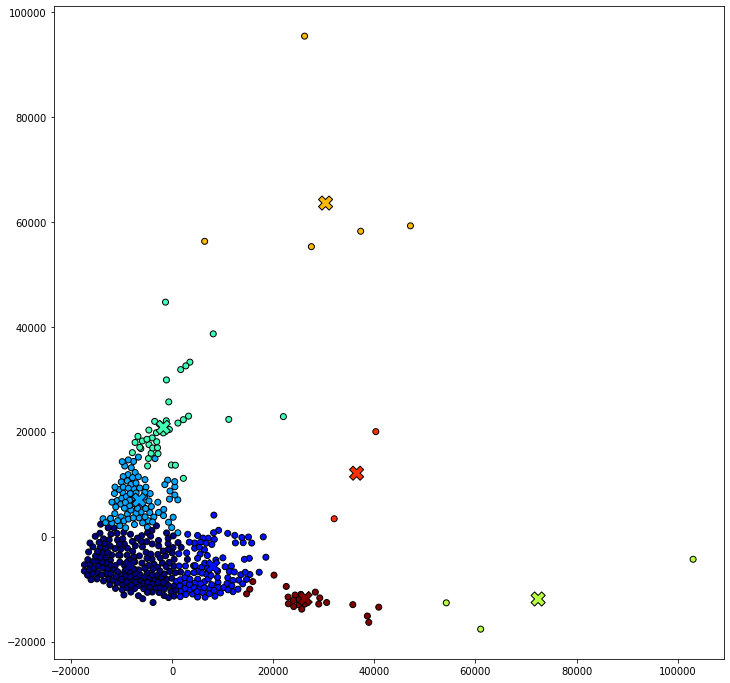

In [275]:
# Índice límite entre datos y centros
limit = customers.shape[0]
labels_centers = range(0, n_clusters_)

# Graficar
fig = plt.figure(figsize=(12,12))
plt.scatter(X_embedded[:limit,0], X_embedded[:limit,1], c=labels, cmap='jet', edgecolors='black')
plt.scatter(X_embedded[limit:,0], X_embedded[limit:,1], c=labels_centers, cmap='jet', marker='X', s=200, edgecolors='black', linewidths=1)
plt.show()

# Análisis de los resultados

In [274]:
# Ver las coordenadas de los centroides
df = pd.DataFrame(cluster_centers, columns=customers.columns)
df['Sum'] = pd.DataFrame(cluster_centers, columns=customers.columns).sum(axis=1)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Sum
0,1.067039,2.519553,6331.743017,2387.787709,2929.664804,2922.530726,682.379888,880.754190,16138.446927
1,1.207921,2.544554,20705.277228,3911.138614,5276.534653,3747.881188,1140.782178,1659.990099,36445.356436
2,1.741573,2.606742,4377.775281,7740.764045,11604.438202,1265.786517,5012.033708,1397.280899,31402.426966
3,1.947368,2.368421,6264.894737,17153.578947,24637.763158,2132.868421,10733.236842,2420.973684,63347.631579
4,1.000000,3.000000,85779.666667,12503.666667,12619.666667,13991.666667,2159.000000,3958.000000,131015.666667
5,2.000000,2.800000,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000,165859.600000
6,1.000000,2.500000,34782.000000,30367.000000,16898.000000,48701.500000,755.500000,26776.000000,158283.500000
7,1.086957,2.652174,42300.434783,3113.304348,4051.130435,4509.521739,813.000000,2187.130435,56978.260870


Los clientes que pertenecen a los clusters 4, 5 y 6 gastan mucho más que los demás, lo cuál podría significar que poseen un alto poder adquisitivo. De ellos, probablemente los del cluster 6 sean más refinados de todos ya que gastan 17 veces más en delicatessen que la media. \

Por otro lado, los clientes del cluster 0 son los que menos gastan, no solo en cuatro de las seis categorías de productos sino también en total. Esto puede significar dos cosas: que son de bajo poder adquisitivo o que son clientes ocasionales (no concurren frecuentemente). \

Los clusters 2 y 3 son muy similares en cuanto a la distribución del gasto entre las diversas categorías (tienen los mismos intereses), pero la 3 gasta en total el doble que la 2. \

Por último, los clusters 1 y 7 gastan una cantidad muy similar en todas las categorías excepto en productos frescos (el 7 gasta el doble), la cuál también es la categoría mayoritaria de ambos grupos.

